In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
!dir | findstr -i housing.csv 

04/01/2021  12:30 PM         1,195,690 housing.csv


In [3]:
housing = pd.read_csv('housing.csv')
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
#there are 20640 records, and 'total_bedrooms' is the only column with null values having 207 missing values

In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


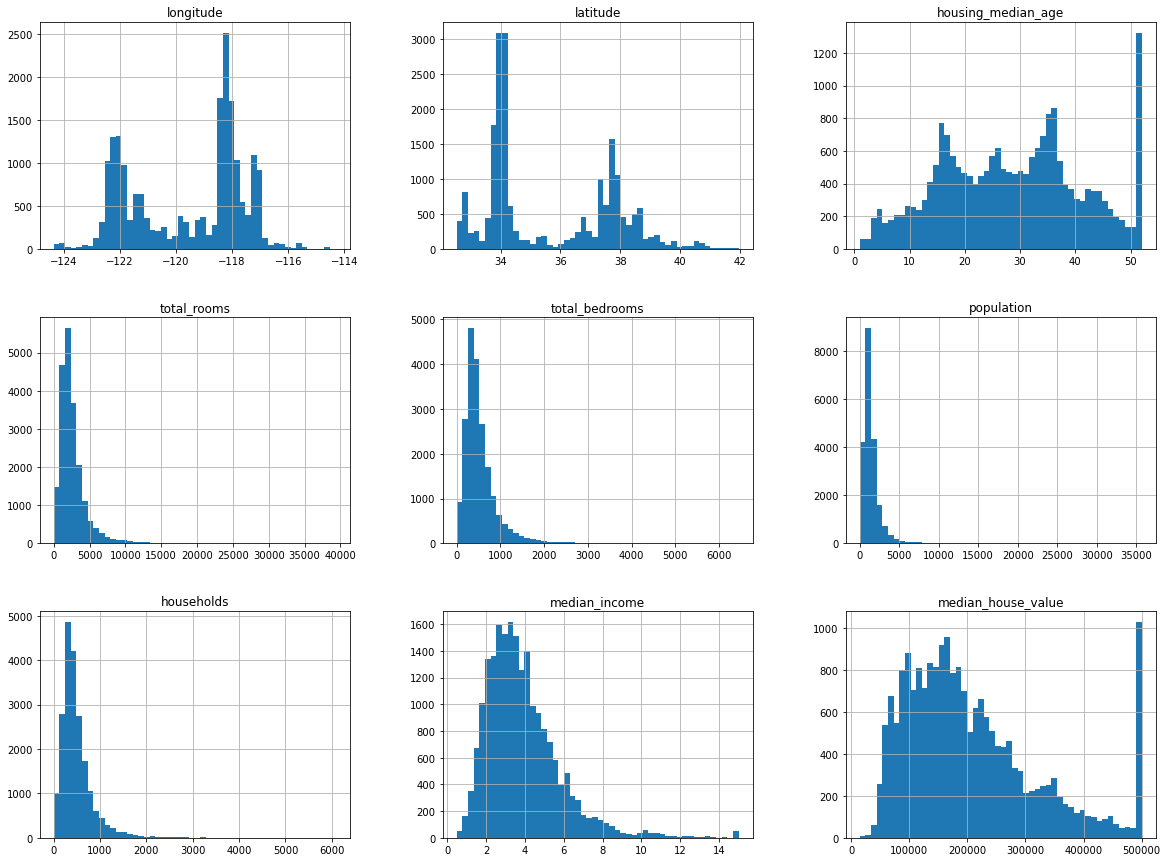

In [8]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

<AxesSubplot:>

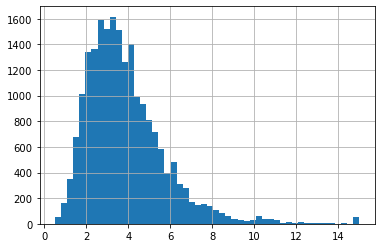

In [9]:
#median_income is right skewed
#note: median_income is in tens of thousands U.S. Dollars

housing['median_income'].hist(bins=50)

In [10]:
#creating 5 buckets or categories for median_income and using ceil function to round values to highest number
housing['income_category'] = np.ceil(housing['median_income']/ 1.5)
#push values greater than category 5 into 5th category
housing['income_category'].where(housing['income_category'] < 5, other=5.0, inplace=True) 

In [11]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,5.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,5.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,5.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,4.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,3.0


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=29)

for train_index, test_index in split.split(housing, housing['income_category']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [13]:
housing['income_category'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_category, dtype: int64

In [14]:
housing['income_category'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_category, dtype: float64

In [15]:
strat_test_set['income_category'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_category, dtype: float64

In [16]:
#as seen above the proportions are maintaned in the test set using stratified sampling

In [17]:
#stratified sampling allows us to take a proprotion of the entire data while maintaining the correct proportions according to 
#all the data for a give field (in this example 'median_income')

In [18]:
#experimenting with random sampling
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=29)

In [19]:
def income_category_proportions(data):
    return data['income_category'].value_counts() / len(data)

comparing_props = pd.DataFrame({
    "Overall Props": income_category_proportions(housing),
    "Random": income_category_proportions(test_set),
    "Stratified": income_category_proportions(strat_test_set)
})

comparing_props['random %error'] = 100 * comparing_props['Random'] / comparing_props['Overall Props'] - 100
comparing_props['strat. %error'] = 100 * comparing_props['Stratified'] / comparing_props['Overall Props'] - 100

In [20]:
comparing_props

,Overall Props,Random,Stratified,random %error,strat. %error
3.0,0.350581,0.344719,0.350533,-1.672195,-0.013820
2.0,0.318847,0.311531,0.318798,-2.294484,-0.015195
4.0,0.176308,0.181686,0.176357,3.050289,0.027480
5.0,0.114438,0.119428,0.114583,4.360711,0.127011
1.0,0.039826,0.042636,0.039729,7.055961,-0.243309


In [21]:
for items in (strat_train_set, strat_test_set):
    items.drop('income_category', axis=1, inplace=True)

In [22]:
housing = strat_train_set.copy()

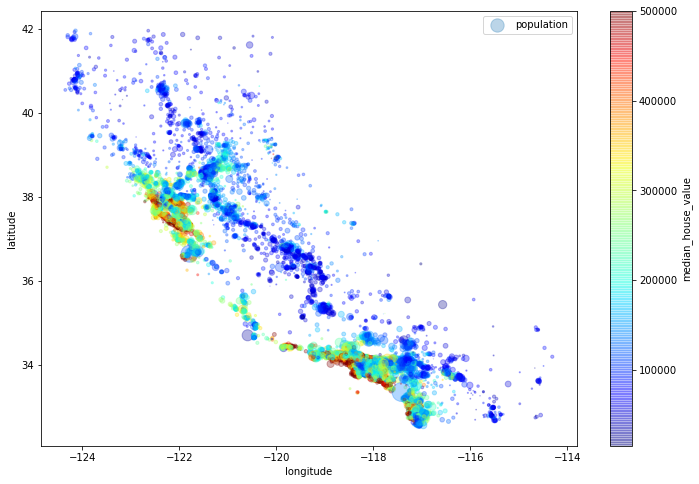

In [23]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, 
            s=housing['population']/100, label='population', figsize=(12, 8), 
            c='median_house_value', cmap=plt.get_cmap('jet'), sharex=False)

plt.legend()

In [24]:
#size of bubbles represent population density, and hotter colors reprepsent a higher median house value

SyntaxError: not a PNG file (<string>)

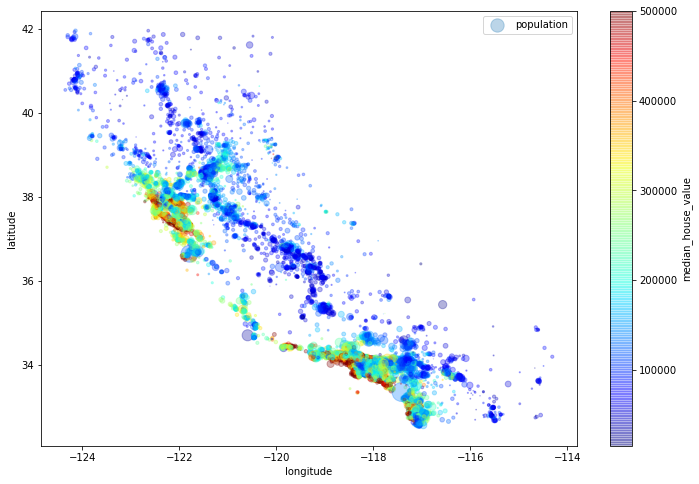

In [25]:
import matplotlib.image as mpimg

ax = housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, 
            s=housing['population']/100, label='population', figsize=(12, 8), 
            c='median_house_value', cmap=plt.get_cmap('jet'), sharex=False)

california_img = mpimg.imread('california.png')
plt.imshow(california_img, extent=[-124, -113.8, 32.5, 42.05], alpha=0.5, cmap=plt.get_cmap('jet'))

plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontside=14)

plt.legend(fontsize=14)
plt.show()

In [26]:
#Pearson's distance correlation
corr_matrix=housing.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691071
total_rooms           0.127306
housing_median_age    0.108483
households            0.060084
total_bedrooms        0.043921
population           -0.028341
longitude            -0.043780
latitude             -0.146422
Name: median_house_value, dtype: float64

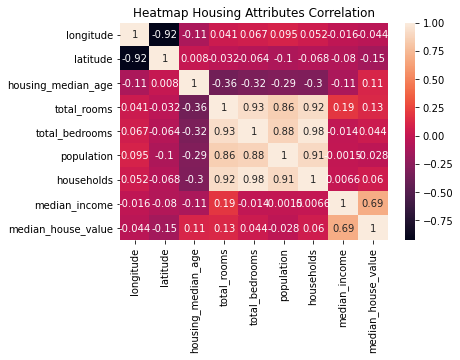

In [27]:
correlated_housing = housing.corr()
sns.heatmap(correlated_housing, annot=True)
plt.title('Heatmap Housing Attributes Correlation')
plt.show()

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

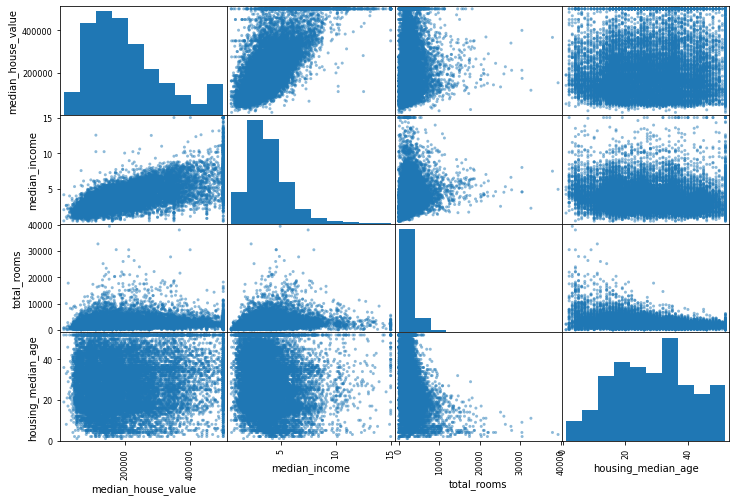

In [28]:
#scatter plots A vs B fashion (issue is that there will so many plots)

housing_attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

from pandas.plotting import scatter_matrix

scatter_matrix(housing[housing_attributes], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

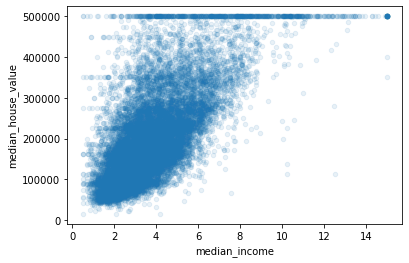

In [29]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [30]:
# Feature Engineering

In [31]:
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']
housing['rooms_per_household'] = housing['total_rooms']/housing['households']

In [32]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691071
rooms_per_household         0.151804
total_rooms                 0.127306
housing_median_age          0.108483
households                  0.060084
total_bedrooms              0.043921
population_per_household   -0.021688
population                 -0.028341
longitude                  -0.043780
latitude                   -0.146422
bedrooms_per_room          -0.253572
Name: median_house_value, dtype: float64

In [33]:
#observation: bedrooms_per_room is highly correlated in a negative way. The lesser the bedroom to room ratio the median housing
#price tends to be more expensive. The rooms_per_houshold is positively correlated to the median house price. 

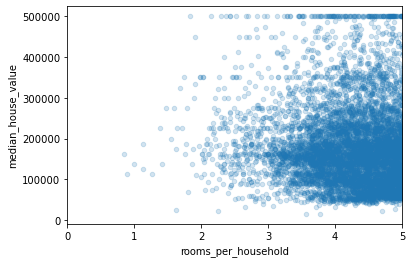

In [34]:
housing.plot(kind='scatter', x='rooms_per_household', y='median_house_value', alpha=0.2)
ax = plt.gca()
ax.set_xlim([0,5])
plt.show()

In [35]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,population_per_household,rooms_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000
mean,-119.574691,35.642798,28.655220,2622.124879,535.192672,1418.447372,496.865492,3.870355,206418.759872,0.212973,3.103875,5.434516
std,2.005064,2.142773,12.535491,2171.310387,421.124910,1137.484934,382.194550,1.903633,115088.961605,0.058323,11.603193,2.520743
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.100000,0.692308,0.846154
25%,-121.800000,33.930000,18.000000,1446.000000,295.000000,785.000000,279.000000,2.559725,119175.000000,0.175448,2.433980,4.443478
50%,-118.500000,34.260000,29.000000,2123.000000,433.000000,1159.000000,407.000000,3.532750,179650.000000,0.202964,2.817596,5.230221
75%,-118.010000,37.720000,37.000000,3121.250000,641.000000,1715.000000,599.000000,4.739375,264700.000000,0.239351,3.273248,6.056361
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1243.333333,141.909091


In [36]:
#Preparing Data for Machine Learning Algorithms

In [37]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [38]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 7771 to 20194
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  int64  
 3   total_rooms         16512 non-null  int64  
 4   total_bedrooms      16349 non-null  float64
 5   population          16512 non-null  int64  
 6   households          16512 non-null  int64  
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(4), int64(4), object(1)
memory usage: 1.3+ MB


In [39]:
####some data cleansing

In [40]:
#Dealing with missing values 'total_bedrooms'. Replacing n/a values with median using Scikit-learns Imputer Class
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy= 'median')

In [41]:
housing_numerical = housing.drop('ocean_proximity', axis=1)

imputer.fit(housing_numerical)

SimpleImputer(strategy='median')

In [42]:
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275])

In [43]:
housing_numerical.median().values

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275])

In [44]:
#using the imputer we created above, we are transforming the training set by replacing the missing values by the learned medians

In [45]:
X = imputer.transform(housing_numerical)

In [46]:
housing_tr = pd.DataFrame(X, columns=housing_numerical.columns)

In [47]:
#cross check for missing values
housing_tr[housing_tr.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


In [48]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.09,33.92,35.0,1994.0,419.0,1491.0,428.0,3.7383
1,-122.57,37.96,52.0,3458.0,468.0,1449.0,471.0,9.1834
2,-121.96,36.97,23.0,4324.0,1034.0,1844.0,875.0,3.0777
3,-118.28,34.02,52.0,281.0,103.0,470.0,96.0,1.9375
4,-116.50,33.81,26.0,5032.0,1229.0,3086.0,1183.0,2.5399


In [49]:
####handling categorical values

In [50]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

7771      <1H OCEAN
9352       NEAR BAY
18657    NEAR OCEAN
4873      <1H OCEAN
12350        INLAND
18621    NEAR OCEAN
15543     <1H OCEAN
14129    NEAR OCEAN
18136     <1H OCEAN
14418    NEAR OCEAN
Name: ocean_proximity, dtype: object

In [51]:
#pandas own factorize method to convert string labels into catgorical features for 'ocean_proximity'

In [52]:
housing_category_encoded, housing_categories = housing_cat.factorize()

In [53]:
housing_category_encoded[:10]

array([0, 1, 2, 0, 3, 2, 0, 2, 0, 2], dtype=int64)

In [54]:
housing_categories

Index(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object')

In [55]:
#using Scikit_Learn's OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_category_encoded.reshape(-1,1))

In [56]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [57]:
#1hot encoder returns a sparse matrix, we change it to a dense array
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [58]:
### Custom Transformations

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin

#column indexes
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self #nothing to do here
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        populations_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, populations_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, populations_per_household]

In [60]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [61]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+['rooms_per_household', 
                                                                                           'population_per_household'])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-118.09,33.92,35,1994,419,1491,428,3.7383,<1H OCEAN,4.65888,3.48364
1,-122.57,37.96,52,3458,468,1449,471,9.1834,NEAR BAY,7.34183,3.07643
2,-121.96,36.97,23,4324,1034,1844,875,3.0777,NEAR OCEAN,4.94171,2.10743
3,-118.28,34.02,52,281,103,470,96,1.9375,<1H OCEAN,2.92708,4.89583
4,-116.5,33.81,26,5032,1229,3086,1183,2.5399,INLAND,4.25359,2.60862


In [62]:
## Setting up Pipepline for all the preprocessing of numerical attributes

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_numerical)
housing_num_tr

array([[ 0.74049299, -0.80402818,  0.50616062, ..., -0.30771122,
         0.03273077, -0.05512278],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.75666902,
        -0.0023651 , -1.17763788],
       [-1.18967887,  0.61940394, -0.45115041, ..., -0.19550447,
        -0.08587951,  0.38012387],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ..., -0.06328319,
        -0.06658929, -0.48812906],
       [-0.09741107,  0.51673015,  1.22414389, ..., -0.43053438,
         0.07888273,  0.19240118],
       [ 0.17690276, -0.64535051, -1.00958184, ..., -0.32344572,
        -0.05235215,  0.40450624]])

In [64]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self #does nothing
    
    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [65]:
#Complete Pipeline

num_attribs = list(housing_numerical.columns) 
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scalar', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse=False))
])

In [66]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [67]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.74049299, -0.80402818,  0.50616062, ...,  0.        ,
         0.        ,  0.        ],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.        ,
         1.        ,  0.        ],
       [-1.18967887,  0.61940394, -0.45115041, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09741107,  0.51673015,  1.22414389, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17690276, -0.64535051, -1.00958184, ...,  0.        ,
         0.        ,  1.        ]])

In [68]:
#Linear Regression Analysis

In [69]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [70]:
#trying the full pipeline on a few training instances

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

In [71]:
print('Prediction: ', lin_reg.predict(some_data_prepared))
print('Actual Labels:', list(some_labels))

Prediction:  [209526.30110297 455497.76141409 252936.22210586 173615.33127943
 114294.56522481]
Actual Labels: [166200, 500001, 263800, 38800, 94800]


In [72]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67949.91466225038

In [73]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [74]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [75]:
#### Cross Validation:

In [76]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv=10, scoring='neg_mean_squared_error')

tree_rmse_scores = np.sqrt(-scores)

In [77]:
def display_scores(scores):
    print('scores:', scores)
    print('mean:', scores.mean())
    print('std deviation', scores.std())

display_scores(tree_rmse_scores)

scores: [71002.4474967  69168.0128036  68814.12379183 72593.51205203
 69014.81049656 68608.20968558 70965.35833592 70223.24427584
 66816.62757918 70493.35535386]
mean: 69769.97018711011
std deviation 1535.163395563644


In [78]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=10, scoring='neg_mean_squared_error')

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

scores: [67641.22210761 69245.155892   65690.83401976 67581.651926
 66586.04760743 66937.30771561 67397.33645629 69807.64170261
 66660.63451034 74883.89423608]
mean: 68243.17261737355
std deviation 2500.726216291981
